# Ford GoBike System Data Exploration

by Ting-Hsiang (Lawrence) Tseng

## Preliminary Wrangling
This project explores a dataset containing one-month (July, 2019) trip data of Bay Wheels's bike sharing system.

In [1]:
# import all packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load the dataset - baywheels trip data in July 2019
bike = pd.read_csv('201907-baywheels-tripdata.csv')

/Users/lawrencetseng/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# convert columns start_time and end_time to timestamp datatype
bike['start_time'] = pd.to_datetime(bike['start_time'])
bike['end_time'] = pd.to_datetime(bike['end_time'])

In [4]:
bike['start_time'] = bike['start_time'].astype('datetime64[s]')
bike['end_time'] = bike['end_time'].astype('datetime64[s]')

In [5]:
# add "day of week" column
day_list = []

for d in range(len(bike)):
    day = bike['start_time'][d].day_name()
    day_list.append(day)
    
bike['start_day'] = day_list

In [6]:
# add "hour" column
hour_list = []

for h in range(len(bike)):
    hour = bike['start_time'][h].hour
    hour_list.append(hour)
    
bike['hour'] = hour_list

It is more intuitive to count the rental period in minutes, so we convert seconds to minutes and add a column in the dataset.

In [7]:
# convert seconds to minutes
bike['duration_min'] = (bike['duration_sec']/60).round(2)

In [8]:
bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,start_day,hour,duration_min
0,85457,2019-07-31 09:25:37,2019-08-01 09:09:54,36.0,Folsom St at 3rd St,37.783830,-122.398870,344.0,16th St Depot,37.766349,-122.396292,3491,Customer,No,NaN,Wednesday,9,1424.28
1,53831,2019-07-31 18:00:10,2019-08-01 08:57:21,139.0,Garfield Square (25th St at Harrison St),37.751017,-122.411901,133.0,Valencia St at 22nd St,37.755213,-122.420975,2457,Customer,No,NaN,Wednesday,18,897.18
2,33674,2019-07-31 22:52:29,2019-08-01 08:13:44,155.0,Emeryville Public Market,37.840521,-122.293528,155.0,Emeryville Public Market,37.840521,-122.293528,2750,Customer,No,NaN,Wednesday,22,561.23
3,34546,2019-07-31 21:59:34,2019-08-01 07:35:21,41.0,Golden Gate Ave at Polk St,37.781270,-122.418740,73.0,Pierce St at Haight St,37.771793,-122.433708,303,Subscriber,No,NaN,Wednesday,21,575.77
4,40244,2019-07-31 20:20:37,2019-08-01 07:31:21,339.0,Jackson St at 11th St,37.800002,-122.266438,233.0,4th Ave at E 12th St (Temporary Location),37.795913,-122.255547,2637,Subscriber,No,NaN,Wednesday,20,670.73


In [9]:
# convert start day into ordered categorical types
ordinal_var_dict = {'start_day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, 
                                                categories = ordinal_var_dict[var])
    bike[var] = bike[var].astype(ordered_var)

In [10]:
bike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,hour,duration_min
count,258102.000000,202215.000000,258102.000000,258102.000000,200526.000000,258102.000000,258102.000000,258102.000000,258102.000000,258102.000000
mean,841.716097,139.127369,37.759941,-122.345750,136.327803,37.760129,-122.345354,163745.691184,13.652068,14.028600
std,1747.999112,117.859707,0.116364,0.133508,116.987765,0.116361,0.133165,263790.607498,4.861475,29.133326
min,60.000000,3.000000,37.279518,-122.514299,3.000000,36.739538,-122.514287,12.000000,0.000000,1.000000
25%,374.000000,44.000000,37.769218,-122.412544,42.000000,37.769429,-122.411738,1493.000000,9.000000,6.230000
50%,595.000000,98.000000,37.780760,-122.398279,93.000000,37.780955,-122.397437,2940.000000,14.000000,9.920000
75%,932.000000,223.000000,37.796320,-122.289370,213.000000,37.797280,-122.290230,294970.000000,18.000000,15.530000
max,86217.000000,443.000000,37.895300,-121.826737,443.000000,37.912955,-121.469453,999422.000000,23.000000,1436.950000


### What is the structure of the dataset?

There are 258102 trips of Bay Wheels bike system in this dataset which initially contains eight features including duration time, start/end time, start/end station's location, start/end station's ID, bike's ID. To help investigate the features of the dataset, three variables are added:
- Starting hour of the day
- Day of the week
- Duration time in minutes

### What are the main features of interest?

In this dataset, I am interested in finding out what features contribute to higher usage rate and longer duration time. The main features include day of the week, hour of the day, and user type.  

## Univariate Exploration

We will start with the distribution of main variables of interest.

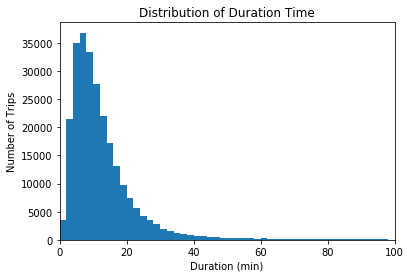

In [11]:
# standard scale
base_color = sb.color_palette()[0]
bins = np.arange(0, bike['duration_min'].max()+2, 2)

plt.hist(data = bike, x = 'duration_min', bins = bins);
plt.xlim(0, 100);
plt.xlabel('Duration (min)');
plt.ylabel('Number of Trips');
plt.title('Distribution of Duration Time');

The initial plot which includes all data has a very tail  on the right side of the curve because of a few extemely large duration time (`duration_min`) in the dataset. After setting the limits on the right end, the plot still has a right-skewed distribution. A log scale will be applied on this duration time below.

In [12]:
np.log10(bike['duration_min'].describe())

count    5.411791
mean     1.147014
std      1.464390
min      0.000000
25%      0.794488
50%      0.996512
75%      1.191171
max      3.157442
Name: duration_min, dtype: float64

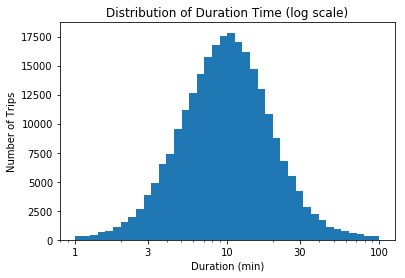

In [13]:
# try a log scaled plot
bins = 10 ** np.arange(0, 2 + 0.05, 0.05)
ticks = [1, 3, 10, 30, 100]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = bike, x = 'duration_min', bins = bins);
plt.xscale('log');
plt.xlabel('Duration (min)');
plt.xticks(ticks, labels);
plt.ylabel('Number of Trips');
plt.title('Distribution of Duration Time (log scale)');

In a log-scale plot, the duration time looks like a unimodal distribution, with the peak between 8 and 10 minutes.

Later, we will investigate the number of trips in different day of the week and in different hour of the day.

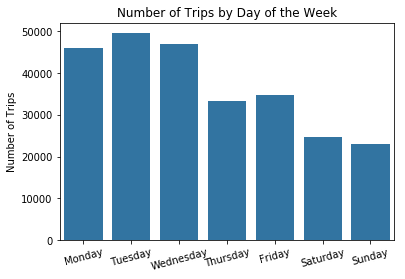

In [14]:
sb.countplot(data = bike, x = 'start_day', color = base_color);
plt.xticks(rotation = 15);
plt.xlabel('');
plt.ylabel('Number of Trips');
plt.title('Number of Trips by Day of the Week');

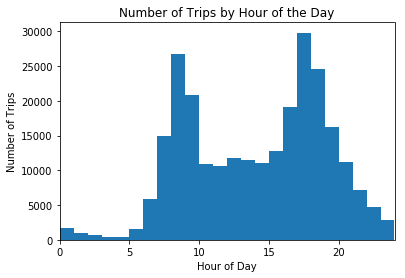

In [15]:
bins = np.arange(0, bike['hour'].max()+2, 1)
plt.hist(data = bike, x = 'hour', color = base_color, bins = bins);
plt.xlim(0, 24);
plt.ylabel('Number of Trips');
plt.xlabel('Hour of Day');
plt.title('Number of Trips by Hour of the Day');

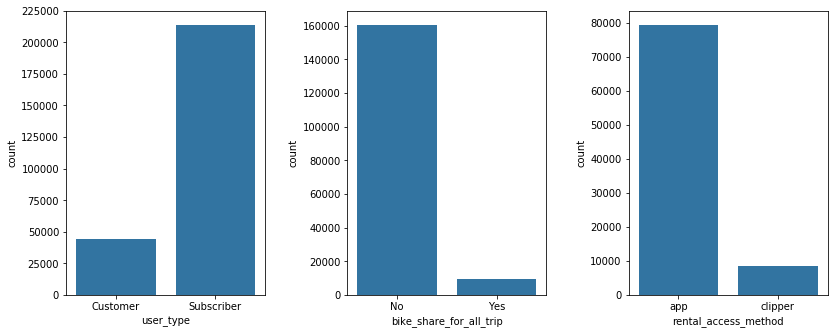

In [16]:
fig, ax = plt.subplots(ncols = 3, figsize = [12, 5])

sb.countplot(data = bike, x = 'user_type', color = base_color, ax = ax[0]);
sb.countplot(data = bike, x = 'bike_share_for_all_trip', color = base_color, ax = ax[1]);
sb.countplot(data = bike, x = 'rental_access_method', color = base_color, ax = ax[2]);

fig.tight_layout(pad=2)

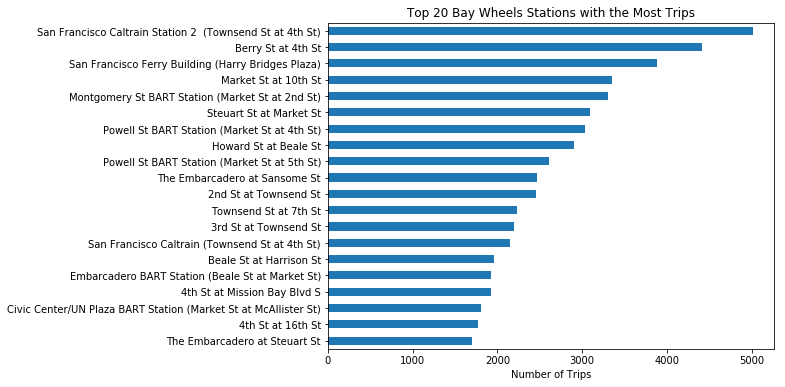

In [17]:
plt.figure(figsize = [8,6])

bike['start_station_name'].value_counts().head(20).sort_values().plot(kind = 'barh', color = base_color);
plt.xlabel('Number of Trips');
plt.title('Top 20 Bay Wheels Stations with the Most Trips');

### Discuss the distributions of variables of interest.

The amount of trips on weekdays are generally more than those on weekends, and the numbers from Mondays to Wednesdays are higher than Thursdays and Fridays. Most of the bike stations of Bay Wheels are located in downtown San Francisco, Oakland, and San Jose, where there are full of people on weekdays while relatively quiet on weekends. During morning and afternoon peak hours, the number of trips are significantly higher than the other time of a day. This finding along with the top 20 station list support the distribution of trips in different day of a week that a lot of people might use the bike system as their commuting mode and start renting the bike from a station near the train station.

The amount of bike trips used by subscribers is significantly higher than customers. These users tend to use app to rent the bike, and they also have a larger impact on the overall usage pattern. Bike share for all is an affordable program for Bay Area residents who are qualified for this special discount. The portion of people in this program might be small; therefore, the number of trips is also trivial.

## Bivariate Exploration

Let's look at relationships between duration time, day of the week, hour of the day, and the user type.

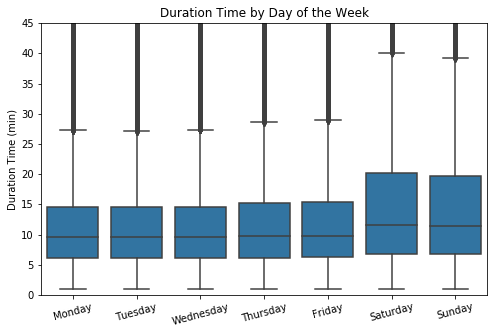

In [18]:
plt.figure(figsize = [8,5])

sb.boxplot(data = bike, x = 'start_day', y = 'duration_min', color = base_color);
plt.ylim(0, 45);
plt.xticks(rotation = 15);
plt.xlabel('');
plt.ylabel('Duration Time (min)');
plt.title('Duration Time by Day of the Week');

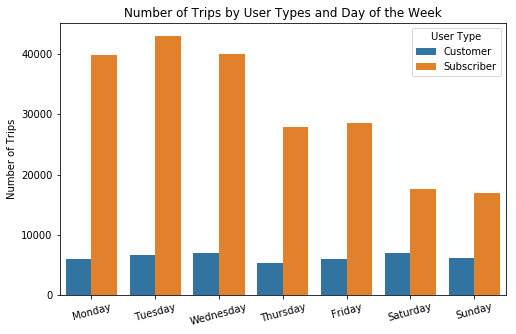

In [19]:
plt.figure(figsize = [8,5])
sb.countplot(data = bike, x = 'start_day', hue = 'user_type');

plt.xlabel('');
plt.ylabel('Number of Trips');
plt.xticks(rotation = 15);
plt.legend(title = 'User Type');
plt.title('Number of Trips by User Types and Day of the Week');

### How does the usage pattern change by different user type and day of the week?

Interestingly, although there are fewer users on the weekends, they tend to use GoBike longer than weekday users. The median duration time on Mondays and Tuesdays are the lowest and gradually increases as the week goes by. From the second graph above, we can find that the number of trips by *Customers* does not change a lot throughout the week; however, the number of trips by *Subscribers* is much lower on the weekend, which is similar to the pattern of combined users. 

Now, we are going to see the change of duration time by different time of a day. 

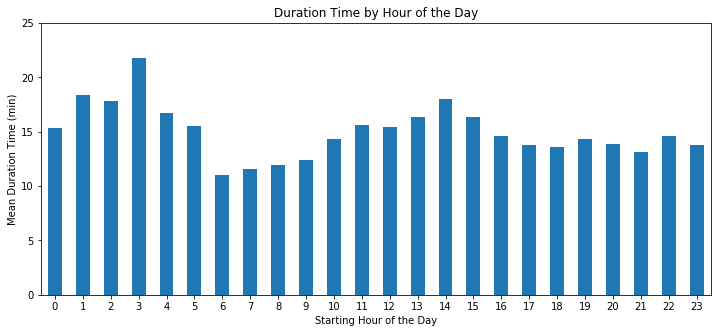

In [20]:
plt.figure(figsize = [12,5])
bike.groupby('hour')['duration_min'].mean().plot(kind = 'bar', color = base_color);

plt.ylim(0, 25);
plt.xlabel('Starting Hour of the Day');
plt.ylabel('Mean Duration Time (min)');
plt.xticks(rotation = 0);
plt.title('Duration Time by Hour of the Day');

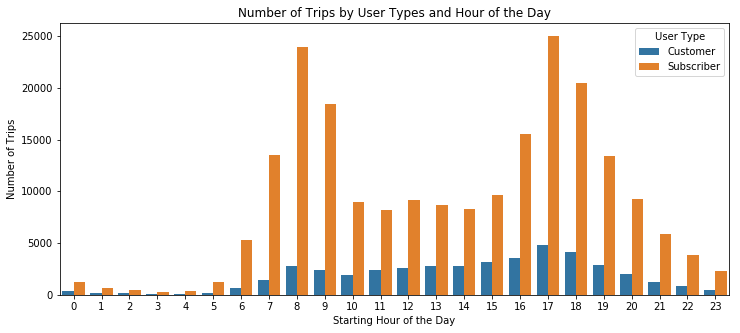

In [21]:
plt.figure(figsize = [12,5])
sb.countplot(data = bike, x = 'hour', hue = 'user_type');

plt.xlabel('Starting Hour of the Day');
plt.ylabel('Number of Trips');
plt.legend(title = 'User Type');
plt.title('Number of Trips by User Types and Hour of the Day');

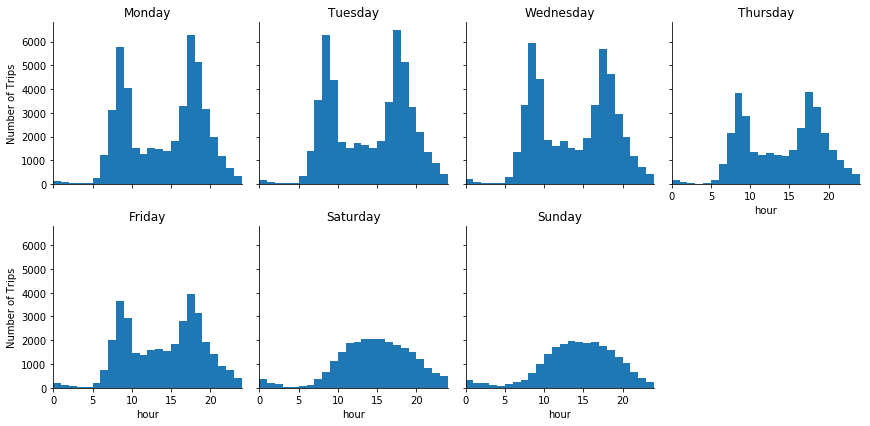

In [22]:
bins = np.arange(0, 23+2, 1);
g = sb.FacetGrid(data = bike, col = 'start_day', col_wrap = 4);
g.map(plt.hist, 'hour', bins = bins);
plt.xlim(0, 24);

axes = g.axes.flatten()
axes[0].set_title('Monday')
axes[1].set_title('Tuesday')
axes[2].set_title('Wednesday')
axes[3].set_title('Thursday')
axes[4].set_title('Friday')
axes[5].set_title('Saturday')
axes[6].set_title('Sunday');

axes[0].set_ylabel('Number of Trips')
axes[4].set_ylabel('Number of Trips');

### What does the Hour of the Day graphs tell us?

The duration time shows a totally different pattern as the number of trips in different hours of the day. The mean duration times are relatively shorter during morning and afternoon peak hours. The number of trips are extremely high during those peak hours on weekdays; however, it peaks at noon and does not have a severe change on weekends.

The last part of this section is to examine the relationship between duration time and the other categorical variables.

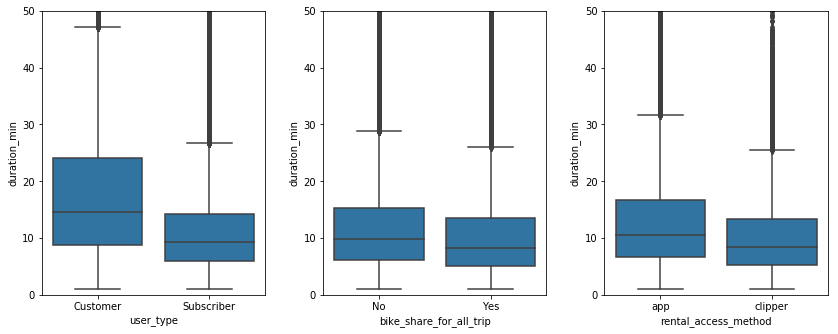

In [23]:
plt.figure(figsize = [12, 5])

# left plot: user_type vs. time
plt.subplot(1, 3, 1)
ax1 = sb.boxplot(data = bike, x = 'user_type', y = 'duration_min', color = base_color)
#plt.yscale('log')
plt.ylim(0, 50);

# center plot: bike share for all trip vs. time
plt.subplot(1, 3, 2)
sb.boxplot(data = bike, x = 'bike_share_for_all_trip', y = 'duration_min', color = base_color)
plt.ylim(ax1.get_ylim());

# right plot: rental access method vs. time
plt.subplot(1, 3, 3)
sb.boxplot(data = bike, x = 'rental_access_method', y = 'duration_min', color = base_color)
plt.ylim(ax1.get_ylim());

plt.tight_layout(pad=2)

From the graphs above, only user types contribute to a larger difference to the duration time with the median value of duration time of customer being 50% more than its counterpart. 

## Multivariate Exploration

The main things I would like to explore in this section are how two types of users contribute to the relationships between duration time and day of the week and between hour of the day and day of the week. 

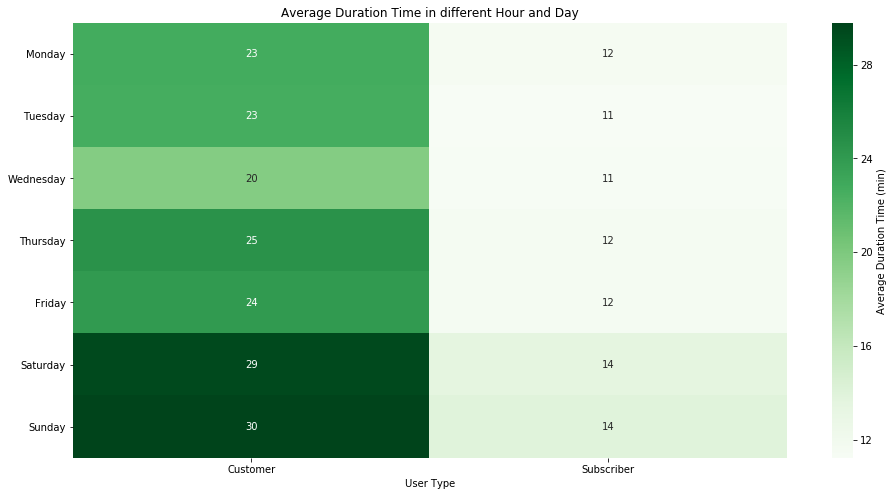

In [24]:
plt.figure(figsize = [16, 8]);

cat_means = bike.groupby(['user_type', 'start_day']).mean()['duration_min']
cat_means = cat_means.reset_index(name = 'duration_min_avg')
cat_means = cat_means.pivot(index = 'start_day', columns = 'user_type', values = 'duration_min_avg')
sb.heatmap(cat_means, annot = True, cbar_kws = {'label': 'Average Duration Time (min)'}, 
           cmap = 'Greens');

plt.xlabel('User Type');
plt.ylabel('');
plt.yticks(rotation = 0);
plt.title('Average Duration Time in different Hour and Day');

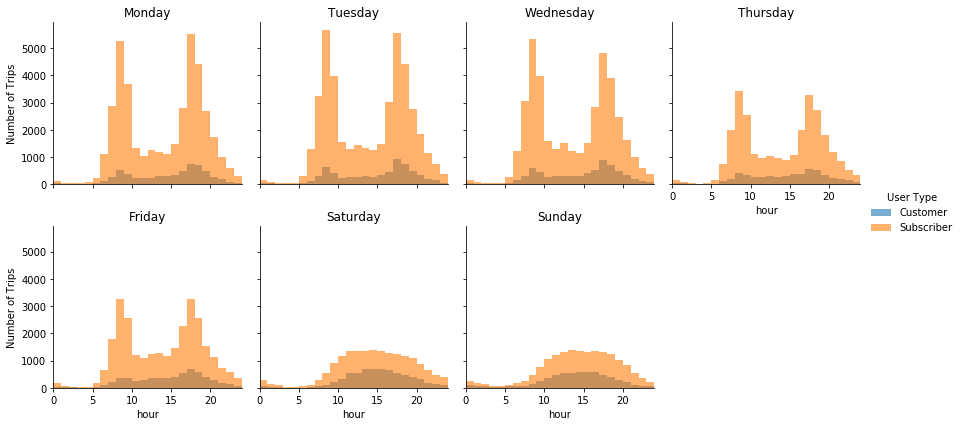

In [25]:
bins = np.arange(0, 23+2, 1);
g = sb.FacetGrid(data = bike, col = 'start_day', hue = 'user_type', col_wrap = 4);
g.map(plt.hist, 'hour', bins = bins, alpha = 0.6).add_legend(title = 'User Type');
plt.xlim(0, 24);

axes = g.axes.flatten()
axes[0].set_title('Monday')
axes[1].set_title('Tuesday')
axes[2].set_title('Wednesday')
axes[3].set_title('Thursday')
axes[4].set_title('Friday')
axes[5].set_title('Saturday')
axes[6].set_title('Sunday');

axes[0].set_ylabel('Number of Trips')
axes[4].set_ylabel('Number of Trips');

### The relationships we observed in Multivariate Exploration.

Previously, we knew that *Subscribers* generally spend less time using GoBike than *Customers*. The average duration time of *Subscribers* on weekdays and weekends are almost the same, between 11 and 14 minutes. On the other hand, the average duration time of *Customers* increases nearly 30% on weekends. It is reasonable that most *Customers* consist of tourists who use the system once in a while and tend to ride GoBike longer than normal commuters.

In bivariate exploration, we already known that the number of trips by different hour and day appears like a bimodal graph on weekdays, which peaks during morning and afternoon peak hours. On the weekends, it gradually increases in the morning, peaks at noon, and then slowly decreases in the evening. In the second graph, we find that the patterns of the number of trips by different hour and day between *Customers* and *Subscribers* are similar. Also, the number of trips of *Customers* does not change as significantly as those of *Subscribers* does on weekdays. 